# Ans1.

### a) The statement is False. Storing the kernel matrix in SVM requires memory that scales quadratically with the number of data points. Training time for traditional SVM algorithms also scales superlinearly with the number of data points. So, these algorithms aren't feasible for large data sets.

### b) The statement is False. SVM classifier performs well even when number of dimensions are more than number of records. It does not performs well when there is very large data set, but the number of features do not affect its performance.

### c) The statement is True.  SVM classifier can handle both linearly and non-linearly separable datasets. When the datasets are non -linearly separable, then the SVM uses Kernel method to map data into different dimensions. So, using Kernel or Polynomial , .SVM can be applied on non-inearly separable dataset as well

# Ans2.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header = None)

In [3]:
data.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
data.columns = ['id number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [5]:
data = data.drop(['id number'], axis = 1)

In [6]:
#Checking for invalid values in the columns
data['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [7]:
data['Uniformity of Cell Size'].unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

In [8]:
data['Uniformity of Cell Shape'].unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64)

In [9]:
data['Marginal Adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

In [10]:
data['Single Epithelial Cell Size'].unique()

array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9], dtype=int64)

In [11]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [12]:
data['Bare Nuclei'].mode()

0    1
dtype: object

In [13]:
#Invalid value ? present in the Bare Nuclei colum. Replacing these values with the mode value of the column
data['Bare Nuclei']= data['Bare Nuclei'].replace('?','1')
#data['Bare Nuclei'].mask(data['Bare Nuclei'] == '?', inplace=True)

In [14]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [15]:
data['Bland Chromatin'].unique()

array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10], dtype=int64)

In [16]:
data['Normal Nucleoli'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64)

In [17]:
data['Mitoses'].unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

In [18]:
data['Class'].unique()

array([2, 4], dtype=int64)

In [19]:
X = pd.DataFrame(data, columns= ['Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'])

In [20]:
Y = pd.DataFrame(data, columns= ['Class'])

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

In [22]:
lsvm= LinearSVC(max_iter = 32000)
lsvm.fit(X_train,Y_train)
Y_pred = lsvm.predict(X_test)
linear_accuracy = lsvm.score(X_test,Y_test)
print(confusion_matrix(Y_test, Y_pred))

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[136   1]
 [  3  70]]


In [23]:
print('Accuracy of Linear SVM= ',linear_accuracy)

Accuracy of Linear SVM=  0.9809523809523809


In [24]:
#Classification report for Linear SVM
LSreport = classification_report(Y_test,Y_pred,output_dict=True)
LSprecission = LSreport['macro avg']['precision']
LSrecall = LSreport['macro avg']['recall']
LSf1score = LSreport['macro avg']['f1-score']
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       137
           4       0.99      0.96      0.97        73

   micro avg       0.98      0.98      0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [25]:
from sklearn.svm import SVC

In [26]:
polySVM = SVC(kernel = 'poly', degree =2)
polySVM.fit(X_train, Y_train)
Y_pred = polySVM.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[135   2]
 [  6  67]]


C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
poly_accuracy = polySVM.score(X_test,Y_test)
print('Accuracy of polynomial SVM= ', poly_accuracy)

Accuracy of polynomial SVM=  0.9619047619047619


In [28]:
PSreport = classification_report(Y_test,Y_pred,output_dict=True)
PSprecission = PSreport['macro avg']['precision']
PSrecall = PSreport['macro avg']['recall']
PSf1score = PSreport['macro avg']['f1-score']
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97       137
           4       0.97      0.92      0.94        73

   micro avg       0.96      0.96      0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



In [29]:
LSVM = [LSprecission,LSrecall,LSf1score,linear_accuracy]
PSVM = [PSprecission,PSrecall,PSf1score,poly_accuracy]
SVMscore = ['Precission','Recall', 'F1-score', 'Accuracy']

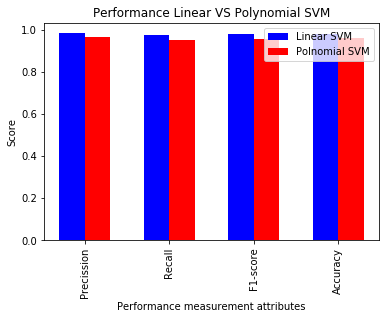

In [30]:
x = np.arange(4)
w=0.3
plt.xticks(x + w /2, SVMscore, rotation='vertical')
plt.bar(x,LSVM,label ='Linear SVM',width=w, color='b', align = 'center')
plt.bar(x+w,PSVM,label ='Polnomial SVM', width=w, color='r', align = 'center')
plt.xlabel('Performance measurement attributes')
plt.ylabel('Score')
plt.title('Performance Linear VS Polynomial SVM')
plt.legend()
plt.show()

### Based on the Classification report of both the SVM classifiers, the linear SVM seems to be working better
### than Polynomial SVM with degree 2 in this scenario.
### The Accuracy, F1-score, Precision and recall is high for linear SVM than the Polynomial SVM.